#### Imports

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from glob import glob
from datetime import datetime
import scipy.io as sio
import cv2

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

### Crear la data per a matlab

#### per video

In [2]:
def open_df_time(df_path, restar_time = False):
    df = pd.read_csv(df_path)
    df.time = df.time.apply(lambda y : datetime.fromisoformat(y))
    df['timestamp'] = df.time.apply(lambda y : y.timestamp())
    if restar_time:
        df['timestamp'] = df['timestamp'] - df['timestamp'][0]
    return df

In [43]:
folder_castphys = Path("D:/TFG_ALEX/castphys_60") ## carpeta de la base de dades
save_folder = Path("../eda") ## carpeta on guardar

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_castphys)]
id = ids[0]
Patient_path = folder_castphys/ f"Patient_{id}"
list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
v_name = list_videos[7]

df_bio = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)

df_bio

,ppg,eda,breath,time,timestamp
0,31580.0,18605.0,38977.0,2023-12-07 12:44:14.744,1.701953e+09
1,31439.0,18696.0,38957.0,2023-12-07 12:44:14.765,1.701953e+09
2,31076.0,18671.0,38461.0,2023-12-07 12:44:14.785,1.701953e+09
3,30481.0,18612.0,38722.0,2023-12-07 12:44:14.795,1.701953e+09
4,29752.0,18540.0,38273.0,2023-12-07 12:44:14.815,1.701953e+09
...,...,...,...,...,...
1598,34194.0,20036.0,31677.0,2023-12-07 12:44:41.368,1.701953e+09
1599,33972.0,19920.0,31952.0,2023-12-07 12:44:41.393,1.701953e+09
1600,33472.0,20028.0,31589.0,2023-12-07 12:44:41.403,1.701953e+09
1601,32709.0,20208.0,31444.0,2023-12-07 12:44:41.423,1.701953e+09


In [23]:
folder_castphys = Path("D:/TFG_ALEX/castphys_60")
save_folder = Path("../eda") ## carpeta on guardar

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_castphys)]
id = ids[0]
Patient_path = folder_castphys/ f"Patient_{id}"
list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
v_name = list_videos[7]

df_bio = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=True)
#df_bio['event'] = [0]*len(df_bio)
#df_bio = df_bio.drop(columns=['ppg','eda','breath','time'])

list_bio = [[t,e,0] for e,t in zip(df_bio['eda'],df_bio['timestamp'])]
#list_bio

#np.savetxt(save_folder/f"{id}_{v_name}.txt", list_bio)
f = open(save_folder/f"{id}_{v_name}.txt", "w")
for e,t in zip(df_bio['eda'],df_bio['timestamp']):
    f.write("{:.3f}".format(t)+f" {e} 0\n")
f.close()

#### total

In [3]:
from src_preproces.biosignalsplux.biosignalsProcessor import open_signals_npy

def create_df2npy_time(df_path, restar_time = False):
    df = open_signals_npy(df_path)
    df['timestamp'] = df.time.apply(lambda y : y.timestamp())
    if restar_time:
        df['timestamp'] = df['timestamp'] - df['timestamp'][0]
    return df

In [26]:
folder_castphys = Path("D:/TFG_ALEX/raw_data/recordings")
save_folder = Path("C:/Users/Xavi/Desktop/eda2")

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_castphys)]
id = 130 #ids[0]
Patient_path = folder_castphys/ f"Patient_{id}"

df_bio = create_df2npy_time(Patient_path, restar_time = True)

f = open(save_folder/f"{id}.txt", "w")
for e,t in zip(df_bio['eda'],df_bio['timestamp']):
    f.write("{:.3f}".format(t)+f" {e} 0\n")
f.close()

#### Fitxer amb tots els events

In [52]:
folder_old = Path("D:/TFG_ALEX/raw_data/recordings")
folder_castphys = Path("D:/TFG_ALEX/castphys_60")
save_folder = Path("../eda") ## carpeta on guardar

list_sub = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_old)]
num_sub = 130 #ids[0]

df_bio = create_df2npy_time(folder_old/ f"Patient_{num_sub}", restar_time = False)

event_list = [0]*len(df_bio)

with open(folder_old/ f"Patient_{num_sub}" / f"meta_{num_sub}.txt") as meta:
    id = int(meta.readline().split(',')[1][:-1])
Patient_path = folder_castphys/ f"Patient_{id}"

list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
for v_name in list_videos:
    start_video = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)['timestamp'][0]
    event_list[df_bio[df_bio.timestamp == start_video].index[0]] = int(v_name.split('_')[0][-1]+v_name.split('_')[1])

df_bio['event'] = event_list
#df_bio['timestamp'] = df_bio['timestamp'] - df_bio['timestamp'][0]
df_bio

f = open(save_folder/f"{id}.txt", "w")
for d,t,e in zip(df_bio['eda'],df_bio['timestamp'],df_bio['event']):
    f.write("{:.3f}".format(t)+f" {d} {e}\n")
f.close()

In [50]:
df_bio[df_bio['event'] != 0]

,ppg,eda,breath,time,timestamp,event
15474,27309.0,20808.0,31288.0,2023-12-07 12:30:25.598,1.701952e+09,51
17711,21928.0,17508.0,35324.0,2023-12-07 12:31:02.886,1.701952e+09,21
23520,33192.0,16272.0,26785.0,2023-12-07 12:32:39.735,1.701952e+09,91
26308,25220.0,17616.0,35028.0,2023-12-07 12:33:26.226,1.701952e+09,71
32895,35040.0,17061.0,27840.0,2023-12-07 12:35:16.031,1.701953e+09,81
35009,33564.0,17188.0,26497.0,2023-12-07 12:35:51.240,1.701953e+09,11
39806,32712.0,17980.0,38112.0,2023-12-07 12:37:11.232,1.701953e+09,52
41915,18650.0,16797.0,40440.0,2023-12-07 12:37:46.374,1.701953e+09,22
46610,27921.0,17905.0,22383.0,2023-12-07 12:39:04.656,1.701953e+09,12
49502,33833.0,29998.0,35921.0,2023-12-07 12:39:52.860,1.701953e+09,72


#### Create all eda files

In [ ]:
folder_old = Path("D:/TFG_ALEX/raw_data/recordings")
folder_castphys = Path("E:/castphys_60")
save_folder = Path("E:/EDA")

list_sub = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_old)]
num_sub = 130 #ids[0]

df_bio = create_df2npy_time(folder_old/ f"Patient_{num_sub}", restar_time = False)

event_list = [0]*len(df_bio)

with open(folder_old/ f"Patient_{num_sub}" / f"meta_{num_sub}.txt") as meta:
    id = int(meta.readline().split(',')[1][:-1])
Patient_path = folder_castphys/ f"Patient_{id}"

list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
for v_name in list_videos:
    start_video = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)['timestamp'][0]
    event_list[df_bio[df_bio.timestamp == start_video].index[0]] = int(v_name.split('_')[0][-1]+v_name.split('_')[1])

df_bio['event'] = event_list
#df_bio['timestamp'] = df_bio['timestamp'] - df_bio['timestamp'][0]
df_bio

f = open(save_folder/f"{id}.txt", "w")
for d,t,e in zip(df_bio['eda'],df_bio['timestamp'],df_bio['event']):
    f.write("{:.3f}".format(t)+f" {d} {e}\n")
f.close()

In [7]:
folder_old = Path("D:/TFG_ALEX/raw_data/recordings")
folder_castphys = Path("E:/castphys_60")
save_folder = Path("E:/EDA")

# lista de videos
list_videos = pd.read_csv(save_folder / "video_time.csv",header=None)[0].values

# crear todas las carpetas
for v_name in list_videos:
    (save_folder / v_name).mkdir(parents=True,exist_ok=True)

list_sub = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=folder_old)]
for num_sub in list_sub:
    # buscar id
    with open(folder_old/ f"Patient_{num_sub}" / f"meta_{num_sub}.txt") as meta:
        id = int(meta.readline().split(',')[1][:-1])
    Patient_path = folder_castphys/ f"Patient_{id}"

    # abrir bio senyals
    df_bio = create_df2npy_time(folder_old/ f"Patient_{num_sub}", restar_time = False)

    # para todos los videos
    for v_name in list_videos:
        # encontrar el inicio del video
        event_list = [0]*len(df_bio)
        start_video = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)['timestamp'][0]
        event_list[df_bio[df_bio.timestamp == start_video].index[0]] = 1

        # guardar file
        f = open(save_folder / v_name /f"{id}.txt", "w")
        for d,t,e in zip(df_bio['eda'],df_bio['timestamp'],event_list):
            f.write("{:.3f}".format(t)+f" {d} {e}\n")
        f.close()

array(['Q1_1', 'Q1_2', 'Q2_1', 'Q2_2', 'Q3_1', 'Q3_2', 'Q4_1', 'Q4_2',
       'Q5_1', 'Q5_2', 'Q6_1', 'Q6_2', 'Q7_1', 'Q7_2', 'Q8_1', 'Q8_2',
       'Q9_1', 'Q9_2'], dtype=object)

### Procesar el resultat de matlab

#### eda1

In [30]:
mat_folder = Path("C:/Users/Xavi/Desktop/eda1")

files = glob("*.mat", root_dir=mat_folder) # vigila 'batchmode_protocol.mat' 
mat_file = files[0]

mat_loaded = sio.loadmat(mat_folder / mat_file)
df = pd.DataFrame({'time':mat_loaded['data']['time'][0,0][0],'conductance':mat_loaded['data']['conductance'][0,0][0]})
df['driver'] = mat_loaded['analysis']['driver'][0,0][0]
df['tonicDriver'] = mat_loaded['analysis']['tonicDriver'][0,0][0]
df['remainder'] = mat_loaded['analysis']['remainder'][0,0][0]
df['phasicData'] = mat_loaded['analysis']['phasicData'][0,0][0]
df['tonicData'] = mat_loaded['analysis']['tonicData'][0,0][0]
df['phasicDriverRaw'] = mat_loaded['analysis']['phasicDriverRaw'][0,0][0]

df

,time,conductance,driver,tonicDriver,remainder,phasicData,tonicData,phasicDriverRaw
0,0.000,18605,323.457216,18267.630534,0,337.369466,18267.630534,337.369404
1,0.021,18696,321.629365,18268.724639,0,428.369466,18267.630534,502.397256
2,0.041,18671,319.670430,18269.766251,0,402.770126,18268.229874,380.594445
3,0.051,18612,317.584594,18270.286912,0,342.928508,18269.071492,293.006632
4,0.071,18540,315.375072,18271.327941,0,270.262701,18269.737299,209.234788
...,...,...,...,...,...,...,...,...
1598,26.624,20036,1029.336392,18959.921868,0,1077.483133,18958.516867,1095.059828
1599,26.649,19920,1052.876561,18961.197877,0,960.713407,18959.286593,863.036419
1600,26.659,20028,1075.492246,18961.708251,0,1067.666339,18960.333661,1155.440819
1601,26.679,20208,1097.119186,18962.728940,0,1246.913265,18961.086735,1393.856080


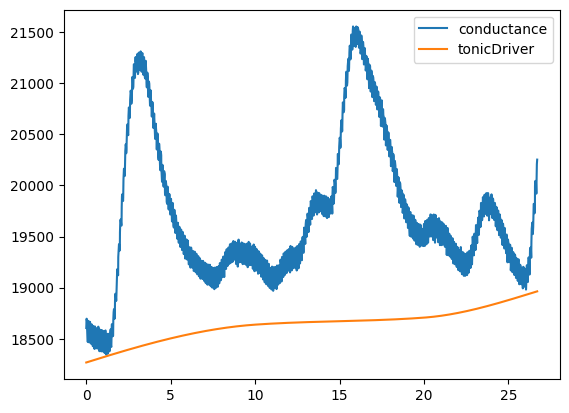

In [36]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['conductance'], label = 'conductance')
ax.plot(df['time'], df['tonicDriver'], label = 'tonicDriver')

ax.legend()
plt.show()

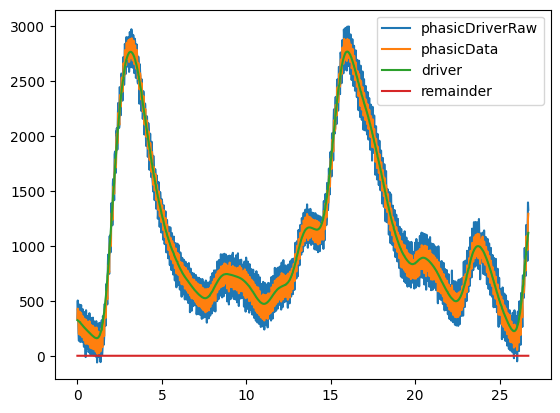

In [38]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['phasicDriverRaw'], label = 'phasicDriverRaw')
ax.plot(df['time'], df['phasicData'], label = 'phasicData')
ax.plot(df['time'], df['driver'], label = 'driver')
ax.plot(df['time'], df['remainder'], label = 'remainder')
ax.legend()
plt.show()

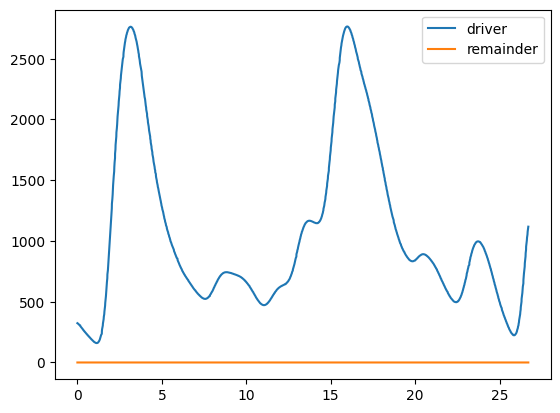

In [39]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['driver'], label = 'driver')
ax.plot(df['time'], df['remainder'], label = 'remainder')
ax.legend()
plt.show()

#### eda2

In [4]:
mat_folder = Path("../eda2") ## carpeta del .mat

files = glob("*.mat", root_dir=mat_folder) # vigila 'batchmode_protocol.mat' 
mat_file = files[1]
print(files)

mat_loaded = sio.loadmat(mat_folder / mat_file)
df = pd.DataFrame({'time':mat_loaded['data']['time'][0,0][0],'conductance':mat_loaded['data']['conductance'][0,0][0]})
df['driver'] = mat_loaded['analysis']['driver'][0,0][0]
df['tonicDriver'] = mat_loaded['analysis']['tonicDriver'][0,0][0]
df['remainder'] = mat_loaded['analysis']['remainder'][0,0][0]
df['phasicData'] = mat_loaded['analysis']['phasicData'][0,0][0]
df['tonicData'] = mat_loaded['analysis']['tonicData'][0,0][0]
df['phasicDriverRaw'] = mat_loaded['analysis']['phasicDriverRaw'][0,0][0]

df

['107.mat', '130.mat', 'batchmode_protocol.mat']


,time,conductance,driver,tonicDriver,remainder,phasicData,tonicData,phasicDriverRaw
0,0.000,14948,368.757426,14586.178368,0,361.821632,14586.178368,361.821587
1,0.019,14880,368.891668,14587.745430,0,293.821632,14586.178368,236.145937
2,0.038,14973,368.955290,14589.313366,0,385.963027,14587.036973,460.424378
3,0.048,15065,368.937629,14590.138947,0,476.715768,14588.284232,550.772284
4,0.068,15025,368.828478,14591.790834,0,435.699539,14589.300461,400.202345
...,...,...,...,...,...,...,...,...
91978,1533.350,19741,3222.501674,16528.587021,0,3219.441714,16521.558286,3229.742609
91979,1533.357,19604,3222.777431,16529.922052,0,3078.590306,16525.409694,2961.036039
91980,1533.380,19597,3223.344157,16534.308802,0,3069.117639,16527.882361,3056.916814
91981,1533.416,19684,3224.174178,16541.175571,0,3152.596227,16531.403773,3214.609475


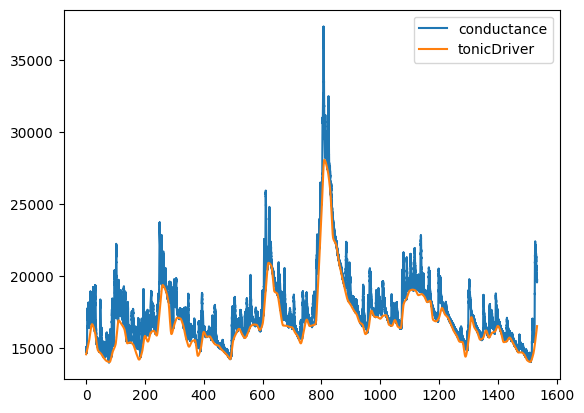

In [5]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['conductance'], label = 'conductance')
ax.plot(df['time'], df['tonicDriver'], label = 'tonicDriver')

ax.legend()
plt.show()

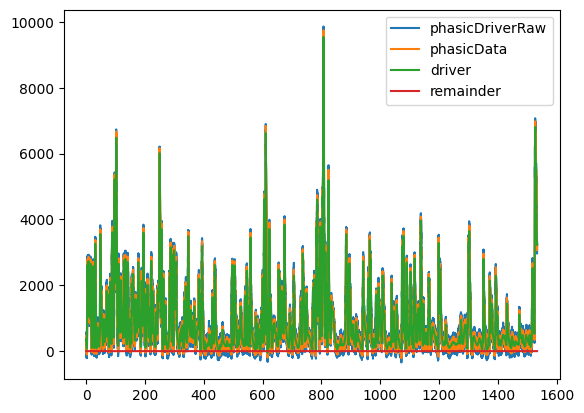

In [6]:
fig, ax = plt.subplots()
ax.plot(df['time'], df['phasicDriverRaw'], label = 'phasicDriverRaw')
ax.plot(df['time'], df['phasicData'], label = 'phasicData')
ax.plot(df['time'], df['driver'], label = 'driver')
ax.plot(df['time'], df['remainder'], label = 'remainder')
ax.legend()
plt.show()

#### obtain videos

In [4]:
from src_preproces.biosignalsplux.biosignalsProcessor import open_signals_npy

def obtain_first_time(df_path):
    df = open_signals_npy(df_path)
    df['timestamp'] = df.time.apply(lambda y : y.timestamp())
    return df['timestamp'].values[0]

In [10]:
folder_old = Path("D:/TFG_ALEX/raw_data/recordings")
folder_castphys = Path("D:/TFG_ALEX/castphys_60")

num_sub = int(mat_file.split('.')[0])
num_sub

with open(folder_old/ f"Patient_{num_sub}" / f"meta_{num_sub}.txt") as meta:
    id = int(meta.readline().split(',')[1][:-1])

t = obtain_first_time(folder_old/ f"Patient_{num_sub}")

df['timestamp'] = df['time'] + t

Patient_path = folder_castphys/ f"Patient_{id}"
list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
v_name = ['Q1_2']#list_videos[7]

df_bio = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)

df1 = df[df.timestamp >= df_bio.timestamp[0]]
df1 = df1[df1.timestamp <= df_bio.timestamp.values[-1]]

df1



,time,conductance,driver,tonicDriver,remainder,phasicData,tonicData,phasicDriverRaw,timestamp
65216,1087.172,18605,235.324293,18373.595052,0,232.424517,18372.575483,314.743249,1.701953e+09
65217,1087.193,18696,231.857236,18374.269503,0,322.865835,18373.134165,396.815222,1.701953e+09
65218,1087.213,18671,228.392834,18374.912646,0,297.243723,18373.756277,275.459926,1.701953e+09
65219,1087.223,18612,224.939925,18375.234518,0,237.610088,18374.389912,188.084953,1.701953e+09
65220,1087.243,18540,221.501655,18375.878871,0,165.147267,18374.852733,104.713552,1.701953e+09
...,...,...,...,...,...,...,...,...,...
66814,1113.796,20036,977.886763,19060.019111,0,975.848922,19060.151078,994.953645,1.701953e+09
66815,1113.821,19920,1009.519582,19059.898283,0,859.921235,19060.078765,764.381213,1.701953e+09
66816,1113.831,20028,1040.926582,19059.849764,0,968.020130,19059.979870,1057.257268,1.701953e+09
66817,1113.851,20208,1072.054948,19059.752402,0,1148.091424,19059.908576,1296.762541,1.701953e+09


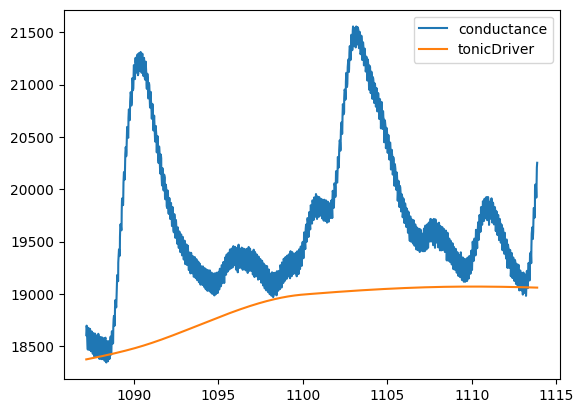

In [11]:
fig, ax = plt.subplots()
ax.plot(df1['time'], df1['conductance'], label = 'conductance')
ax.plot(df1['time'], df1['tonicDriver'], label = 'tonicDriver')

ax.legend()
plt.show()

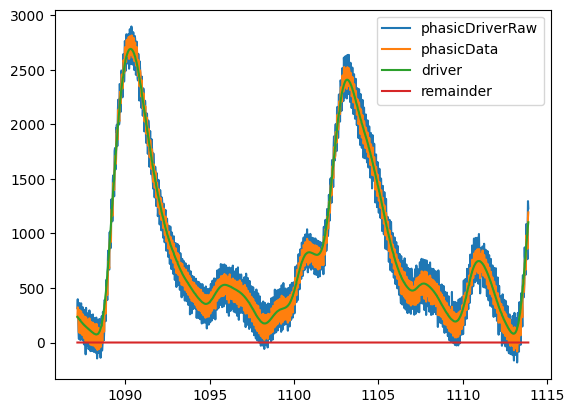

In [12]:
fig, ax = plt.subplots()
ax.plot(df1['time'], df1['phasicDriverRaw'], label = 'phasicDriverRaw')
ax.plot(df1['time'], df1['phasicData'], label = 'phasicData')
ax.plot(df1['time'], df1['driver'], label = 'driver')
ax.plot(df1['time'], df1['remainder'], label = 'remainder')
ax.legend()
plt.show()

### General plot

In [11]:
from src_preproces.biosignalsplux.biosignalsProcessor import open_signals_npy

def obtain_first_time(df_path):
    df = open_signals_npy(df_path)
    df['timestamp'] = df.time.apply(lambda y : y.timestamp())
    return df['timestamp'].values[0]

def id2num_sub(id , folder):
    list_nums = [int(f.split('_')[1]) for f in glob("Patient_*", root_dir=folder)]
    for num_sub in list_nums:
        with open(folder_old/ f"Patient_{num_sub}" / f"meta_{num_sub}.txt") as meta:
            if id == int(meta.readline().split(',')[1][:-1]):
                return num_sub
    return -1

In [15]:
folder_eda = Path("E:/EDA")
folder_castphys = Path("E:/castphys_60")
folder_old = Path("D:/castphys_raw/recordings")

ids = [int(f.split('_')[1]) for f in glob("Patient_*", root_dir=folder_castphys)]
id = 45 #ids[0]
Patient_path = folder_castphys/ f"Patient_{id}"
list_videos = glob("Q*",root_dir=Patient_path)# + glob("E*",root_dir=Patient_path)
v_name = 'Q1_2'#list_videos[7]

mat_loaded = sio.loadmat(folder_eda / v_name / f"{id}.mat")
df = pd.DataFrame({'time':mat_loaded['data']['time'][0,0][0],'conductance':mat_loaded['data']['conductance'][0,0][0]})
df['driver'] = mat_loaded['analysis']['driver'][0,0][0]
df['tonicDriver'] = mat_loaded['analysis']['tonicDriver'][0,0][0]
df['remainder'] = mat_loaded['analysis']['remainder'][0,0][0]
df['phasicData'] = mat_loaded['analysis']['phasicData'][0,0][0]
df['tonicData'] = mat_loaded['analysis']['tonicData'][0,0][0]
df['phasicDriverRaw'] = mat_loaded['analysis']['phasicDriverRaw'][0,0][0]

df

num_sub = id2num_sub(id, folder_old)
t = obtain_first_time(folder_old/ f"Patient_{num_sub}")

df['timestamp'] = df['time'] + t


df_bio = open_df_time(Patient_path / v_name / 'bio.csv', restar_time=False)

df1 = df[df.timestamp >= df_bio.timestamp[0]]
df1 = df1[df1.timestamp <= df_bio.timestamp.values[-1]]

df1

,time,conductance,driver,tonicDriver,remainder,phasicData,tonicData,phasicDriverRaw,timestamp
19073,317.866,12808,216.342743,12702.105793,0,66.241621,12741.758379,-20132.136090,1.705086e+09
19074,317.875,12886,216.158318,12701.488831,0,145.474643,12740.525357,35589.060533,1.705086e+09
19075,317.895,12930,216.154943,12700.121527,0,190.703213,12739.296787,-3268.392743,1.705086e+09
19076,317.925,13028,215.450068,12698.080344,0,289.928926,12738.071074,11223.839581,1.705086e+09
19077,317.927,12992,215.255552,12697.944679,0,255.156903,12736.843097,-20346.832708,1.705086e+09
...,...,...,...,...,...,...,...,...,...
20941,349.006,11956,49.412946,12052.587157,0,-109.415523,12065.415523,-26926.823283,1.705086e+09
20942,349.026,12006,50.835182,12052.073421,0,-59.022523,12065.022523,34047.988298,1.705086e+09
20943,349.037,12152,51.559424,12051.790149,0,87.371888,12064.628112,18698.483790,1.705086e+09
20944,349.056,12206,52.487192,12051.299678,0,141.766823,12064.233177,-11561.408122,1.705086e+09


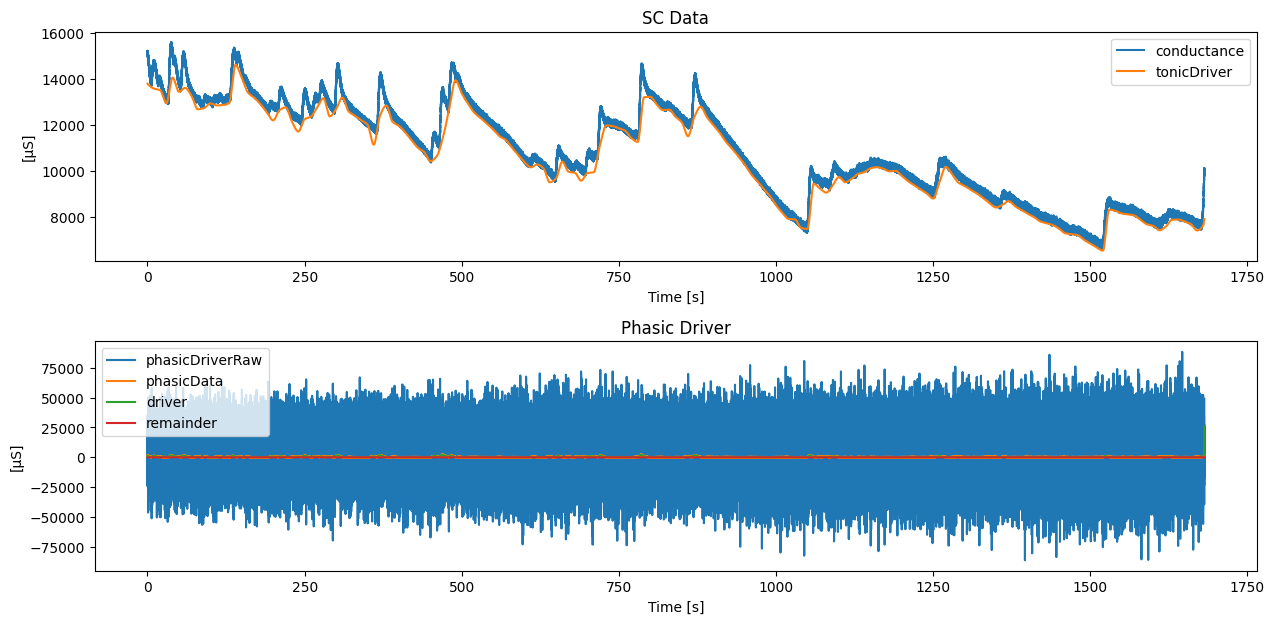

In [16]:
fig, axs = plt.subplots(2)
fig.set_size_inches(15,7)
plt.subplots_adjust(hspace=0.35)

## up
axs[0].plot(df['time'], df['conductance'], label = 'conductance')
axs[0].plot(df['time'], df['tonicDriver'], label = 'tonicDriver')
axs[0].set_title("SC Data")
axs[0].set_ylabel('[µS]')
axs[0].set_xlabel('Time [s]')
axs[0].legend()
## down
axs[1].plot(df['time'], df['phasicDriverRaw'], label = 'phasicDriverRaw')
axs[1].plot(df['time'], df['phasicData'], label = 'phasicData')
axs[1].plot(df['time'], df['driver'], label = 'driver')
axs[1].plot(df['time'], df['remainder'], label = 'remainder')
axs[1].set_title("Phasic Driver")
axs[1].set_ylabel('[µS]')
axs[1].set_xlabel('Time [s]')
axs[1].legend()

plt.show()

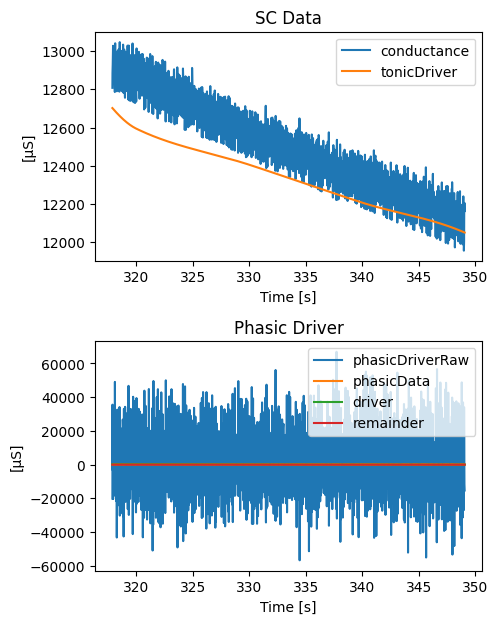

In [17]:
fig, axs = plt.subplots(2)
fig.set_size_inches(5,7)
plt.subplots_adjust(hspace=0.35)

## up
axs[0].plot(df1['time'], df1['conductance'], label = 'conductance')
axs[0].plot(df1['time'], df1['tonicDriver'], label = 'tonicDriver')
axs[0].set_title("SC Data")
axs[0].set_ylabel('[µS]')
axs[0].set_xlabel('Time [s]')
axs[0].legend()
## down
axs[1].plot(df1['time'], df1['phasicDriverRaw'], label = 'phasicDriverRaw')
axs[1].plot(df1['time'], df1['phasicData'], label = 'phasicData')
axs[1].plot(df1['time'], df1['driver'], label = 'driver')
axs[1].plot(df1['time'], df1['remainder'], label = 'remainder')
axs[1].set_title("Phasic Driver")
axs[1].set_ylabel('[µS]')
axs[1].set_xlabel('Time [s]')
axs[1].legend()

plt.show()

### Comprovar video duracio

In [4]:
folder_castphys = Path("D:/TFG_ALEX/castphys_60")
folder_crop = Path("D:/TFG_ALEX")

files_corps = glob("vid_crop*", root_dir=folder_crop)
crop_video_file = files_corps[1]

id = int(crop_video_file.split('__')[1])
video_name = crop_video_file.split('__')[-1].split('.')[0]

video = cv2.VideoCapture(str(folder_crop / crop_video_file))
frames = []
ret_val, frame = video.read()
while ret_val:
    #frames.append(frame) # BGR
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # RGB
    ret_val, frame = video.read()

(np.array(frames)).shape

(2355, 350, 450, 3)

In [5]:
df_bio = pd.read_csv(folder_castphys / f"Patient_{id}" / video_name / "bio.csv")
df_bio

,ppg,eda,breath,time
0,21928.0,17508.0,35324.0,2023-12-07 12:31:02.886
1,21781.0,17463.0,35000.0,2023-12-07 12:31:02.896
2,21696.0,17388.0,35108.0,2023-12-07 12:31:02.917
3,22112.0,17264.0,35016.0,2023-12-07 12:31:02.924
4,24264.0,17295.0,35028.0,2023-12-07 12:31:02.946
...,...,...,...,...
2350,26745.0,17798.0,25345.0,2023-12-07 12:31:42.064
2351,25680.0,17733.0,25804.0,2023-12-07 12:31:42.074
2352,24720.0,17629.0,25760.0,2023-12-07 12:31:42.090
2353,23832.0,17687.0,26230.0,2023-12-07 12:31:42.110


In [10]:
if len(df_bio) == len(frames):
    print("\033[0;32m"+"Patient",id,video_name+": Correct"+'\033[0;m')
else:
    print("\033[0;31m"+"Patient",id,video_name+": Incorrect"+'\033[0;m')

Patient 28 Q2_1: Correct


In [12]:
folder_castphys = Path("D:/TFG_ALEX/castphys_60")
folder_crop = Path("D:/TFG_ALEX")

files_corps = glob("vid_crop*", root_dir=folder_crop)
crop_video_file = files_corps[1]

id = int(crop_video_file.split('__')[1])
video_name = crop_video_file.split('__')[-1].split('.')[0]

video = cv2.VideoCapture(str(folder_crop / crop_video_file))
frames = []
ret_val, frame = video.read()
while ret_val:
    frames.append(frame) # BGR
    #frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # RGB
    ret_val, frame = video.read()

df_bio = pd.read_csv(folder_castphys / f"Patient_{id}" / video_name / "bio.csv")

if len(df_bio) == len(frames):
    print("\033[0;32m"+"Patient",id,video_name+": Correct"+'\033[0;m')
else:
    print("\033[0;31m"+"Patient",id,video_name+": Incorrect"+'\033[0;m')

Patient 28 Q2_1: Correct


### Events EDA straction

In [2]:
def obtain_params_mat(mat_loaded):
    mat_dict = {}

    mat_dict['nSCR']      = mat_loaded['results']['CDA'][0,0][0,0][0][0,0]
    mat_dict['Latency']   = mat_loaded['results']['CDA'][0,0][0,0][1][0,0]
    mat_dict['AmpSum']    = mat_loaded['results']['CDA'][0,0][0,0][2][0,0]
    mat_dict['PhasicMax'] = mat_loaded['results']['CDA'][0,0][0,0][5][0,0]
    mat_dict['Tonic']     = mat_loaded['results']['CDA'][0,0][0,0][6][0,0]

    return mat_dict

In [56]:
castphys_folder = Path("E:/castphys_60")
eda_folder = Path("E:/EDA")
list_videos = glob("Q*",root_dir=eda_folder)
v_name = "Q1_1"

dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
for id in ids:
    mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
    mat_dict = obtain_params_mat(mat_loaded)
    for e in mat_dict:
        dict_all_mat[e].append(mat_dict[e])

df_eda_1 = pd.DataFrame(dict_all_mat)
df_eda_1

,nSCR,Latency,AmpSum,PhasicMax,Tonic
0,17,2.348,3836.331963,589.861809,8445.707146
1,19,1.083,10155.265817,1265.488060,23957.625626
2,19,1.482,3919.440959,835.643391,12587.194835
3,28,1.729,3118.722383,211.024336,5023.323350
4,5,7.857,7288.525758,2111.649448,8636.256187
...,...,...,...,...,...
57,24,1.068,7958.229608,383.692655,3152.415576
58,11,1.789,4108.525028,837.676416,11592.300272
59,7,5.991,3304.925022,1037.455911,16573.816078
60,71,1.251,3519.523300,186.643284,2111.497755


In [57]:
v_name = "Q9_1"

dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
for id in ids:
    mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
    mat_dict = obtain_params_mat(mat_loaded)
    for e in mat_dict:
        dict_all_mat[e].append(mat_dict[e])

df_eda_9 = pd.DataFrame(dict_all_mat)
df_eda_9

,nSCR,Latency,AmpSum,PhasicMax,Tonic
0,23,8.482,4056.028257,1106.927732,12422.865369
1,33,3.157,12119.416546,982.596537,24260.643935
2,45,1.694,4319.832124,316.169175,14011.587387
3,39,1.916,5301.429601,366.113250,8592.897679
4,27,1.222,5938.923757,586.845304,8073.578886
...,...,...,...,...,...
57,36,1.675,12057.249800,387.224436,3465.547316
58,7,6.579,2820.617104,716.374219,6351.565090
59,31,7.144,5825.687835,662.999336,17841.992837
60,89,1.291,5997.861361,236.766399,2447.471421


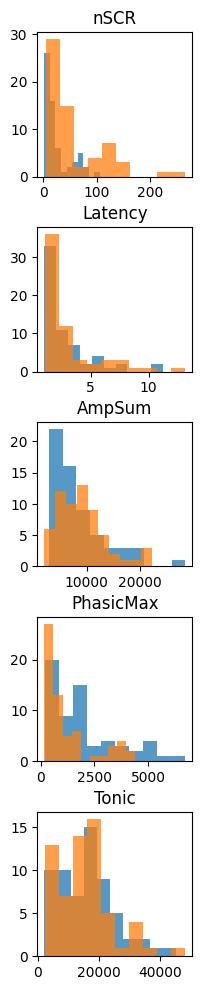

In [58]:
fig, axs = plt.subplots(5)
fig.set_size_inches(2,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(df_eda_1.columns):
    axs[i].set_title(c)
    axs[i].hist(df_eda_1[c], alpha=0.75)
    axs[i].hist(df_eda_9[c], alpha=0.75)

plt.show()

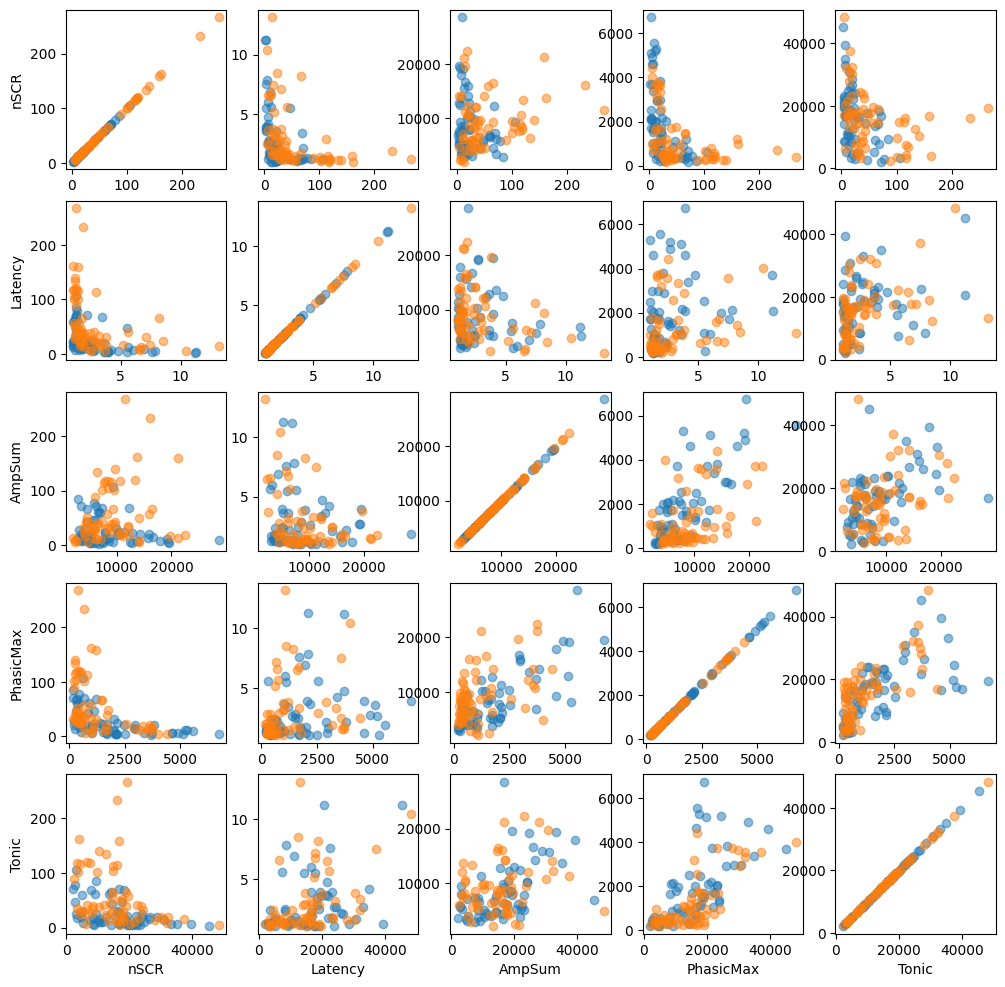

In [59]:
fig, axs = plt.subplots(5,5)
fig.set_size_inches(12,12)
plt.subplots_adjust(hspace=0.2,wspace=0.2)

for i1,c1 in enumerate(df_eda_1.columns):
    axs[i1,0].set_ylabel(c1)
    axs[4,i1].set_xlabel(c1)
    for i2,c2 in enumerate(df_eda_1.columns):
        axs[i1,i2].scatter(df_eda_1[c1],df_eda_1[c2], alpha=0.5)
        axs[i1,i2].scatter(df_eda_9[c1],df_eda_9[c2], alpha=0.5)

plt.show()

#### EDA analisy

In [13]:
castphys_folder = Path("E:/castphys_60")
eda_folder = Path("E:/EDA")

dict_df_eda = {}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
list_videos = glob("Q*",root_dir=eda_folder)
for v_name in list_videos:
    dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

    for id in ids:
        mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
        mat_dict = obtain_params_mat(mat_loaded)
        for e in mat_dict:
            dict_all_mat[e].append(mat_dict[e])

    dict_df_eda[v_name] = dict_all_mat
dict_df_eda

{'Q1_1': {'nSCR': [17,
   19,
   19,
   28,
   5,
   13,
   6,
   10,
   4,
   7,
   31,
   20,
   14,
   68,
   22,
   47,
   4,
   6,
   20,
   106,
   71,
   8,
   78,
   59,
   43,
   29,
   15,
   4,
   12,
   4,
   11,
   69,
   66,
   16,
   61,
   85,
   12,
   10,
   6,
   4,
   61,
   20,
   24,
   8,
   20,
   14,
   4,
   11,
   17,
   24,
   9,
   2,
   4,
   22,
   21,
   47,
   7,
   24,
   11,
   7,
   71,
   7],
  'Latency': [2.3480000495910645,
   1.0829999446868896,
   1.4819998741149902,
   1.7289998531341553,
   7.857000112533569,
   5.610999822616577,
   4.750999927520752,
   1.741999864578247,
   3.5959999561309814,
   4.185999870300293,
   1.2409999370574951,
   2.0889999866485596,
   1.0260000228881836,
   3.3970000743865967,
   1.0880000591278076,
   5.486999988555908,
   3.6449999809265137,
   3.9110000133514404,
   1.0169999599456787,
   1.2430000305175781,
   2.2070000171661377,
   1.5230000019073486,
   1.3359999656677246,
   1.0550000667572021,
   1.24100

In [14]:
max_dict = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}
min_dict = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}


v_name_0 = list_videos[0]
for i,id in enumerate(ids):
    for e in max_dict:
        max_v = dict_df_eda[v_name_0][e][i]
        min_v = dict_df_eda[v_name_0][e][i]

        for v_name in list_videos[1:]:
            max_v = max(dict_df_eda[v_name][e][i],max_v)
            min_v = min(dict_df_eda[v_name][e][i],min_v)
        max_dict[e].append(max_v)
        min_dict[e].append(min_v)

for i,id in enumerate(ids):
    for e in max_dict:
        for v_name in list_videos:
            dict_df_eda[v_name][e][i] = (dict_df_eda[v_name][e][i]-min_dict[e][i])/(max_dict[e][i]-min_dict[e][i])

for v_name in list_videos:
    dict_df_eda[v_name] = pd.DataFrame(dict_df_eda[v_name])
dict_df_eda

{'Q1_1':         nSCR   Latency    AmpSum  PhasicMax     Tonic
 0   0.142857  0.133219  0.151005   0.038874  0.048442
 1   0.081967  0.015436  0.448969   0.356093  0.913182
 2   0.131313  0.051982  0.152654   0.291487  0.000000
 3   0.071429  0.686217  0.091780   0.076442  0.292351
 4   0.000000  0.930683  0.383674   0.208650  0.248841
 ..       ...       ...       ...        ...       ...
 57  0.174603  0.028746  0.174553   0.394004  0.450679
 58  0.088608  0.100690  0.101526   0.119151  0.552407
 59  0.000000  0.479860  0.136846   0.200770  0.182019
 60  0.098131  0.266156  0.023843   0.000000  0.012573
 61  0.000000  0.689655  0.056576   1.000000  0.687707
 
 [62 rows x 5 columns],
 'Q1_2':         nSCR   Latency    AmpSum  PhasicMax     Tonic
 0   0.000000  0.709184  0.667666   1.000000  0.286504
 1   0.213115  0.619625  0.620739   1.000000  0.345139
 2   0.313131  0.124034  0.474773   0.609677  0.510867
 3   0.193878  0.038123  0.284318   0.141017  0.093345
 4   0.013699  0.604881

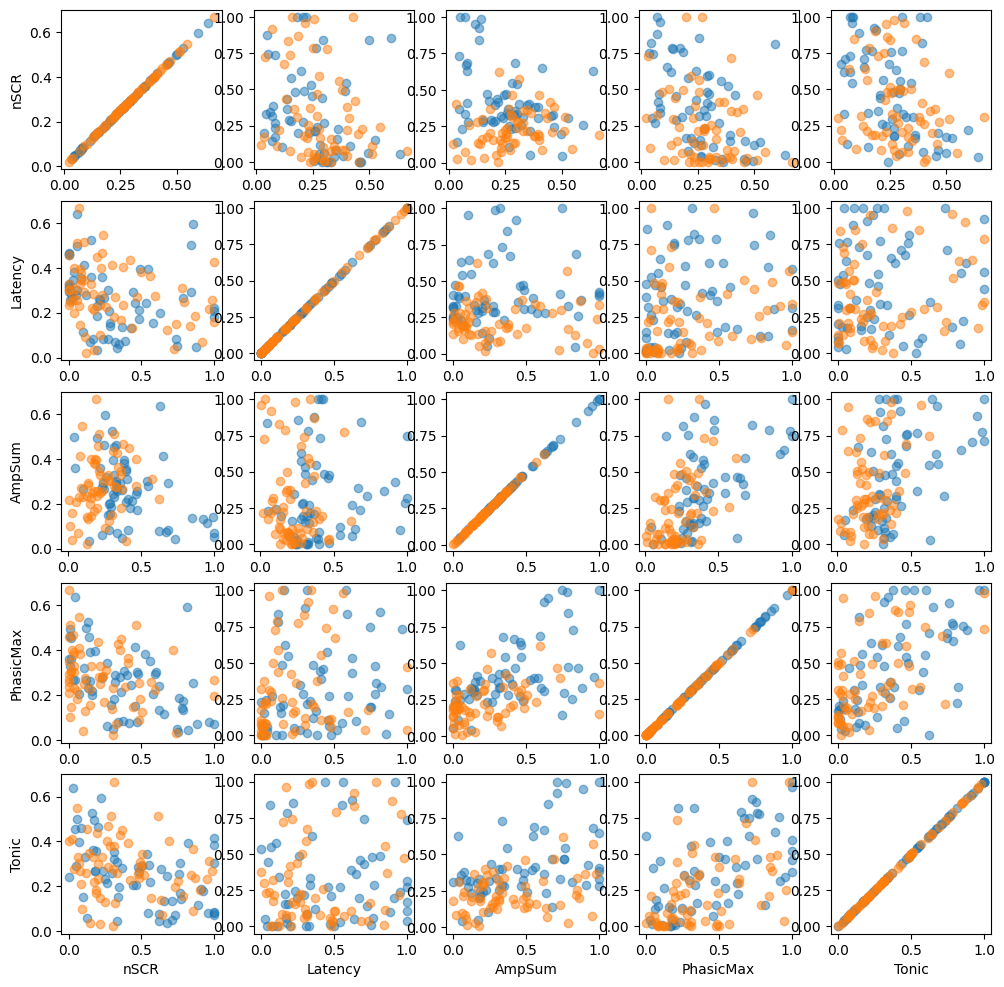

In [18]:
v_name1 = "Q2_1"
v_name2 = "Q9_1"

fig, axs = plt.subplots(5,5)
fig.set_size_inches(12,12)
plt.subplots_adjust(hspace=0.2,wspace=0.2)

for i1,c1 in enumerate(dict_df_eda[v_name1].columns):
    axs[i1,0].set_ylabel(c1)
    axs[4,i1].set_xlabel(c1)
    for i2,c2 in enumerate(dict_df_eda[v_name1].columns):
        axs[i1,i2].scatter(dict_df_eda[v_name1][c1],dict_df_eda[v_name1][c2], alpha=0.5)
        axs[i1,i2].scatter(dict_df_eda[v_name2][c1],dict_df_eda[v_name2][c2], alpha=0.5)

plt.show()

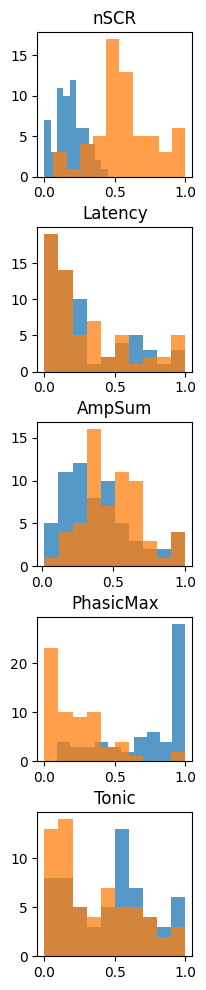

In [43]:
v_name1 = "Q1_2"
v_name2 = "Q7_1"

fig, axs = plt.subplots(5)
fig.set_size_inches(2,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i].set_title(c)
    axs[i].hist(dict_df_eda[v_name1][c], alpha=0.75)
    axs[i].hist(dict_df_eda[v_name2][c], alpha=0.75)

plt.show()

In [2]:
def clr_y_select(name):
    c = name.split('_')[0]
    if c == 'Q1':
        return "yellow",-4
    elif c == 'Q2':
        return "lime",-3
    elif c == 'Q3':
        return "blue",-2
    elif c == 'Q4':
        return "red",-1
    elif c == 'Q5':
        return "orange",0
    elif c == 'Q6':
        return "cyan",1
    elif c == 'Q7':
        return "blueviolet",2
    elif c == 'Q8':
        return "magenta",3
    elif c == 'Q9':
        return "greenyellow",4
    else:
        return "grey",10

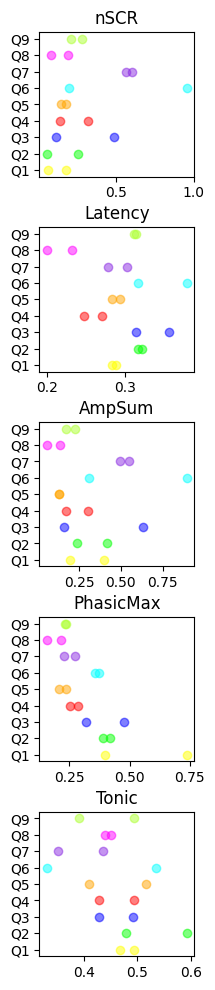

In [37]:
fig, axs = plt.subplots(5)
fig.set_size_inches(2,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i].set_title(c)
    for v_name in dict_df_eda:
        clr,y = clr_y_select(v_name)
        axs[i].scatter(np.mean(dict_df_eda[v_name][c]),y,color=clr, alpha=0.5)
    plt.sca(axs[i])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])

plt.show()

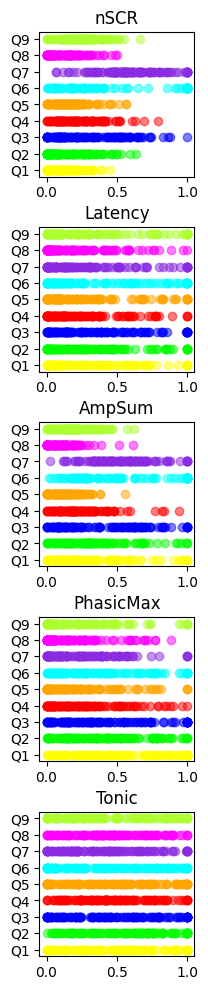

In [38]:
fig, axs = plt.subplots(5)
fig.set_size_inches(2,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i].set_title(c)
    for v_name in dict_df_eda:
        clr,y = clr_y_select(v_name)
        axs[i].scatter(dict_df_eda[v_name][c],[y]*len(dict_df_eda[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
plt.show()

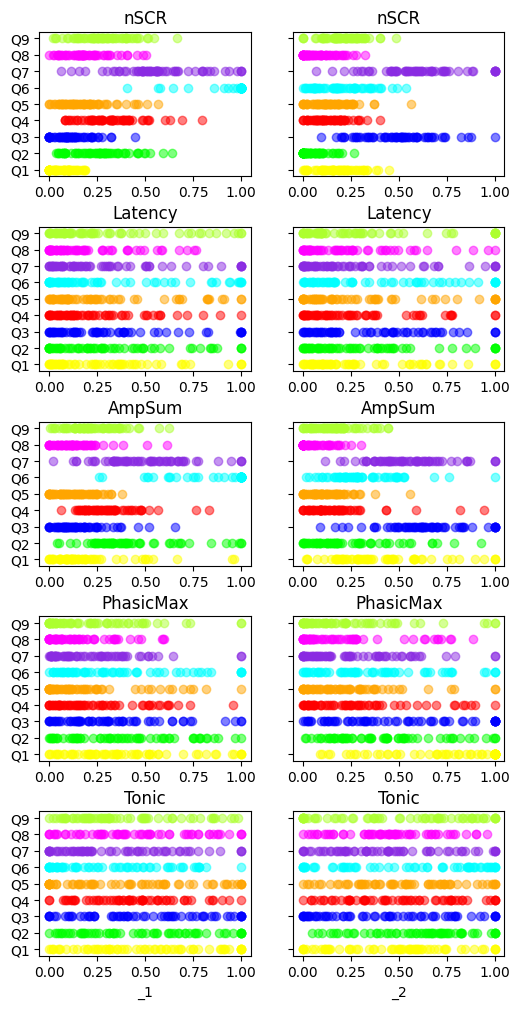

In [52]:
fig, axs = plt.subplots(5,2)
fig.set_size_inches(6,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i,0].set_title(c)
    axs[i,1].set_title(c)
    for v_name in dict_df_eda:
        i2 = int(v_name.split('_')[1])-1
        clr,y = clr_y_select(v_name)
        axs[i,i2].scatter(dict_df_eda[v_name][c],[y]*len(dict_df_eda[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i,0])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
    axs[i,1].set_yticklabels([])
axs[4,0].set_xlabel('_1')
axs[4,1].set_xlabel('_2')
plt.show()

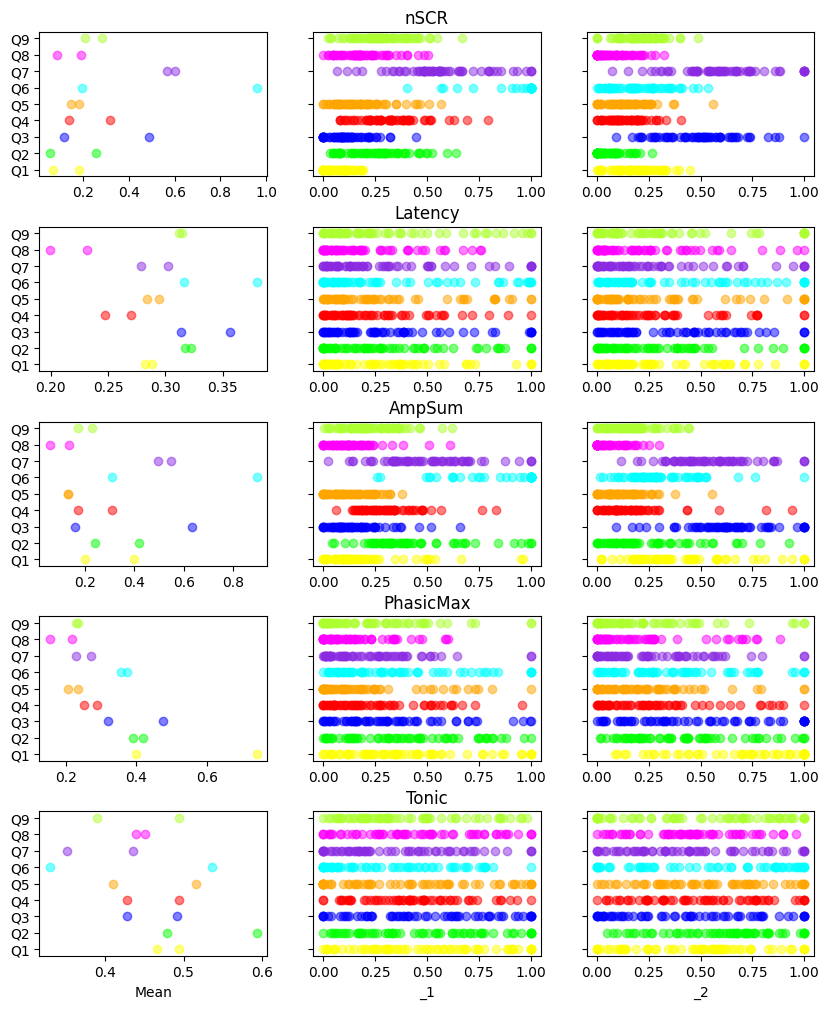

In [60]:
fig, axs = plt.subplots(5,3)
fig.set_size_inches(10,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i,1].set_title(c)
    for v_name in dict_df_eda:
        i2 = int(v_name.split('_')[1])
        clr,y = clr_y_select(v_name)
        axs[i,0].scatter(np.mean(dict_df_eda[v_name][c]),y,color=clr, alpha=0.5)
        axs[i,i2].scatter(dict_df_eda[v_name][c],[y]*len(dict_df_eda[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i,0])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
    axs[i,1].set_yticklabels([])
    axs[i,2].set_yticklabels([])
axs[4,0].set_xlabel('Mean')
axs[4,1].set_xlabel('_1')
axs[4,2].set_xlabel('_2')
plt.show()

In [57]:
castphys_folder = Path("E:/castphys_60")
eda_folder = Path("E:/EDA")

dict_df_eda1 = {}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
list_videos = glob("Q*",root_dir=eda_folder)
for v_name in list_videos:
    dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

    for id in ids:
        mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
        mat_dict = obtain_params_mat(mat_loaded)
        for e in mat_dict:
            dict_all_mat[e].append(mat_dict[e])

    dict_df_eda1[v_name] = pd.DataFrame(dict_all_mat)
dict_df_eda1

{'Q1_1':     nSCR  Latency        AmpSum    PhasicMax         Tonic
 0     17    2.348   3836.331963   589.861809   8445.707146
 1     19    1.083  10155.265817  1265.488060  23957.625626
 2     19    1.482   3919.440959   835.643391  12587.194835
 3     28    1.729   3118.722383   211.024336   5023.323350
 4      5    7.857   7288.525758  2111.649448   8636.256187
 ..   ...      ...           ...          ...           ...
 57    24    1.068   7958.229608   383.692655   3152.415576
 58    11    1.789   4108.525028   837.676416  11592.300272
 59     7    5.991   3304.925022  1037.455911  16573.816078
 60    71    1.251   3519.523300   186.643284   2111.497755
 61     7    2.470   5125.443471  1644.387720   8422.705415
 
 [62 rows x 5 columns],
 'Q1_2':     nSCR  Latency        AmpSum    PhasicMax         Tonic
 0      9    7.735  11151.705686  7910.433039  10471.212527
 1     27    2.727  12911.769473  3066.999037  20321.162101
 2     37    2.060   6945.932939  1481.687601  14374.45696

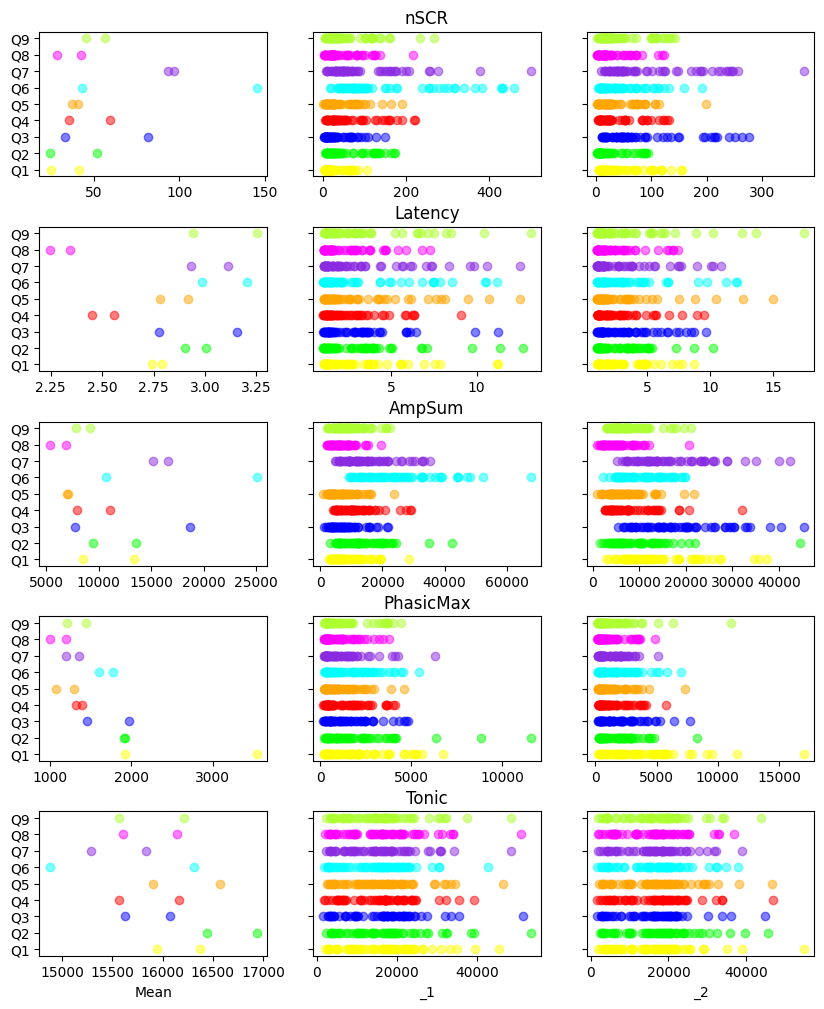

In [61]:
fig, axs = plt.subplots(5,3)
fig.set_size_inches(10,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda1[v_name1].columns):
    axs[i,1].set_title(c)
    for v_name in dict_df_eda1:
        i2 = int(v_name.split('_')[1])
        clr,y = clr_y_select(v_name)
        axs[i,0].scatter(np.mean(dict_df_eda1[v_name][c]),y,color=clr, alpha=0.5)
        axs[i,i2].scatter(dict_df_eda1[v_name][c],[y]*len(dict_df_eda1[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i,0])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
    axs[i,1].set_yticklabels([])
    axs[i,2].set_yticklabels([])
axs[4,0].set_xlabel('Mean')
axs[4,1].set_xlabel('_1')
axs[4,2].set_xlabel('_2')
plt.show()

#### EDA1
Error en el matlab no he canviado el nombre del fitchero

In [11]:
def obtain_params_mat(mat_loaded):
    mat_dict = {}

    mat_dict['nSCR']      = mat_loaded['results']['CDA'][0,0][0,0][0][0,0]
    mat_dict['Latency']   = mat_loaded['results']['CDA'][0,0][0,0][1][0,0]
    mat_dict['AmpSum']    = mat_loaded['results']['CDA'][0,0][0,0][2][0,0]
    mat_dict['PhasicMax'] = mat_loaded['results']['CDA'][0,0][0,0][5][0,0]
    mat_dict['Tonic']     = mat_loaded['results']['CDA'][0,0][0,0][6][0,0]

    return mat_dict

def clr_y_select(name):
    c = name.split('_')[0]
    if c == 'Q1':
        return "yellow",-4
    elif c == 'Q2':
        return "lime",-3
    elif c == 'Q3':
        return "blue",-2
    elif c == 'Q4':
        return "red",-1
    elif c == 'Q5':
        return "orange",0
    elif c == 'Q6':
        return "cyan",1
    elif c == 'Q7':
        return "blueviolet",2
    elif c == 'Q8':
        return "magenta",3
    elif c == 'Q9':
        return "greenyellow",4
    else:
        return "grey",10
    
v_name1 = "Q1_2"

In [13]:
castphys_folder = Path("E:/castphys_60")
eda_folder = Path("E:/EDA")

dict_df_eda_raw = {}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
list_videos = glob("Q*",root_dir=eda_folder)
for v_name in list_videos:
    dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

    for id in ids:
        mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
        mat_dict = obtain_params_mat(mat_loaded)
        for e in mat_dict:
            dict_all_mat[e].append(mat_dict[e])

    dict_df_eda_raw[v_name] = pd.DataFrame(dict_all_mat)
dict_df_eda_raw

{'Q1_1':     nSCR  Latency        AmpSum    PhasicMax         Tonic
 0     18    2.348   5406.737166  1572.889949   8711.109439
 1     25    1.083  14832.097360  1841.132067  23969.816549
 2     27    1.482   5879.555263   840.868005  12705.777047
 3     40    1.729   4802.197962   226.738888   5093.023414
 4      7    7.857   8542.632660  2111.649448   9276.081989
 ..   ...      ...           ...          ...           ...
 57    36    1.068  11490.279719   383.692655   3155.085924
 58    17    1.789   5842.592289   837.676416  11442.786050
 59     9    5.991   4193.958904  1037.455911  16794.914879
 60   105    1.251   5288.289404   186.643284   2105.487212
 61    11    2.470   5371.221740  1644.387720   8883.074222
 
 [62 rows x 5 columns],
 'Q1_2':     nSCR  Latency        AmpSum    PhasicMax         Tonic
 0      9    7.735  11151.705686  7910.433039  11558.958688
 1     30    2.727  15117.046560  3066.999037  20851.521239
 2     38    2.060   7814.054815  1481.687601  14488.96810

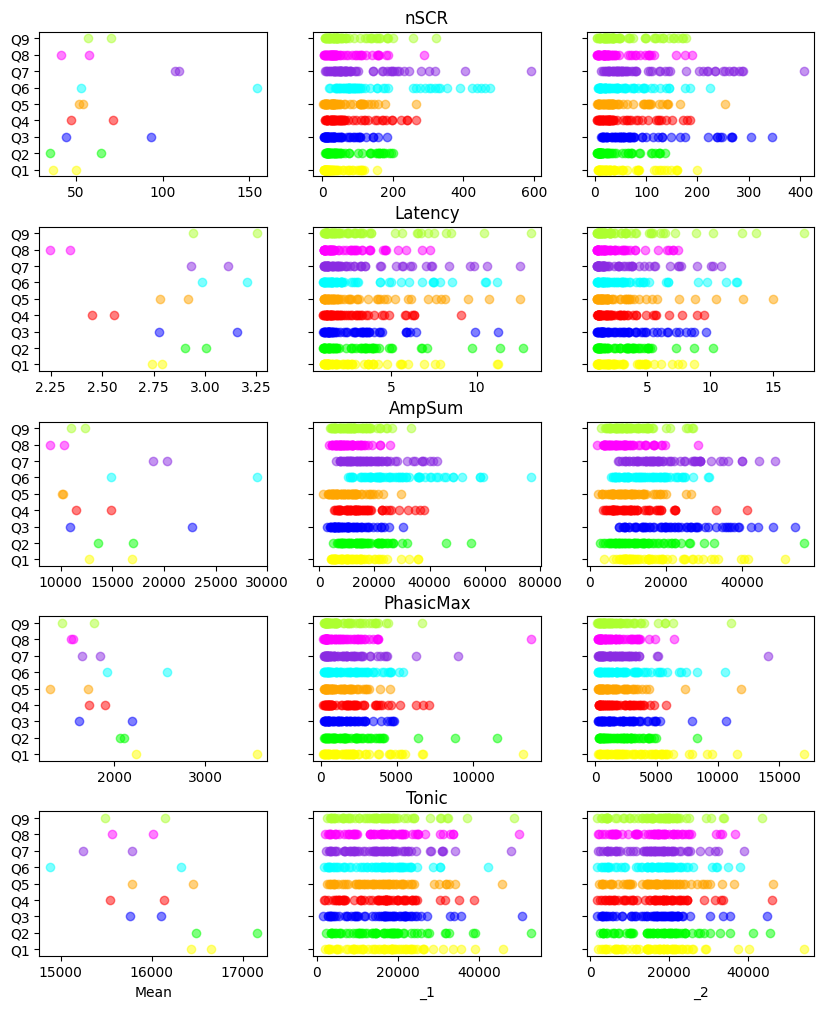

In [14]:
fig, axs = plt.subplots(5,3)
fig.set_size_inches(10,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda_raw[v_name1].columns):
    axs[i,1].set_title(c)
    for v_name in dict_df_eda_raw:
        i2 = int(v_name.split('_')[1])
        clr,y = clr_y_select(v_name)
        axs[i,0].scatter(np.mean(dict_df_eda_raw[v_name][c]),y,color=clr, alpha=0.5)
        axs[i,i2].scatter(dict_df_eda_raw[v_name][c],[y]*len(dict_df_eda_raw[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i,0])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
    axs[i,1].set_yticklabels([])
    axs[i,2].set_yticklabels([])
axs[4,0].set_xlabel('Mean')
axs[4,1].set_xlabel('_1')
axs[4,2].set_xlabel('_2')
plt.show()

In [16]:
castphys_folder = Path("E:/castphys_60")
eda_folder = Path("E:/EDA")

dict_df_eda = {}

ids = [int(patient.split('_')[1]) for patient in glob("Patient_*", root_dir=castphys_folder)]
list_videos = glob("Q*",root_dir=eda_folder)
for v_name in list_videos:
    dict_all_mat = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}

    for id in ids:
        mat_loaded = sio.loadmat(eda_folder / v_name / f"{id}_era.mat")
        mat_dict = obtain_params_mat(mat_loaded)
        for e in mat_dict:
            dict_all_mat[e].append(mat_dict[e])

    dict_df_eda[v_name] = dict_all_mat
dict_df_eda

{'Q1_1': {'nSCR': [18,
   25,
   27,
   40,
   7,
   21,
   10,
   11,
   6,
   9,
   48,
   29,
   16,
   76,
   34,
   60,
   8,
   7,
   34,
   155,
   114,
   12,
   114,
   83,
   76,
   42,
   19,
   8,
   16,
   6,
   14,
   98,
   111,
   22,
   87,
   119,
   13,
   14,
   10,
   5,
   108,
   29,
   58,
   12,
   25,
   19,
   6,
   15,
   19,
   41,
   11,
   5,
   7,
   26,
   28,
   71,
   10,
   36,
   17,
   9,
   105,
   11],
  'Latency': [2.3480000495910645,
   1.0829999446868896,
   1.4819998741149902,
   1.7289998531341553,
   7.857000112533569,
   5.610999822616577,
   4.750999927520752,
   1.741999864578247,
   3.5959999561309814,
   4.185999870300293,
   1.2409999370574951,
   2.0889999866485596,
   1.0260000228881836,
   3.3970000743865967,
   1.0880000591278076,
   5.486999988555908,
   3.6449999809265137,
   3.9110000133514404,
   1.0169999599456787,
   1.2430000305175781,
   2.2070000171661377,
   1.5230000019073486,
   1.3359999656677246,
   1.055000066757202

In [17]:
max_dict = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}
min_dict = {'nSCR':[],'Latency':[],'AmpSum':[],'PhasicMax':[],'Tonic':[]}


v_name_0 = list_videos[0]
for i,id in enumerate(ids):
    for e in max_dict:
        max_v = dict_df_eda[v_name_0][e][i]
        min_v = dict_df_eda[v_name_0][e][i]

        for v_name in list_videos[1:]:
            max_v = max(dict_df_eda[v_name][e][i],max_v)
            min_v = min(dict_df_eda[v_name][e][i],min_v)
        max_dict[e].append(max_v)
        min_dict[e].append(min_v)

for i,id in enumerate(ids):
    for e in max_dict:
        for v_name in list_videos:
            dict_df_eda[v_name][e][i] = (dict_df_eda[v_name][e][i]-min_dict[e][i])/(max_dict[e][i]-min_dict[e][i])

for v_name in list_videos:
    dict_df_eda[v_name] = pd.DataFrame(dict_df_eda[v_name])
dict_df_eda

{'Q1_1':         nSCR   Latency    AmpSum  PhasicMax     Tonic
 0   0.150000  0.133219  0.143883   0.167937  0.080953
 1   0.087719  0.015436  0.602060   0.521951  0.922823
 2   0.182692  0.051982  0.090556   0.294061  0.000000
 3   0.078431  0.686217  0.137185   0.051712  0.306252
 4   0.000000  0.930683  0.373520   0.185814  0.310649
 ..       ...       ...       ...        ...       ...
 57  0.196721  0.028746  0.177109   0.328230  0.472293
 58  0.120482  0.100690  0.147618   0.119151  0.554825
 59  0.000000  0.479860  0.103822   0.195878  0.172807
 60  0.150000  0.266156  0.005396   0.000000  0.000000
 61  0.000000  0.689655  0.000000   1.000000  0.769196
 
 [62 rows x 5 columns],
 'Q1_2':         nSCR   Latency    AmpSum  PhasicMax     Tonic
 0   0.000000  0.709184  0.513798   1.000000  0.431871
 1   0.175439  0.619625  0.620007   1.000000  0.442139
 2   0.288462  0.124034  0.302223   0.609677  0.530941
 3   0.205882  0.038123  0.312478   0.068002  0.092013
 4   0.013514  0.604881

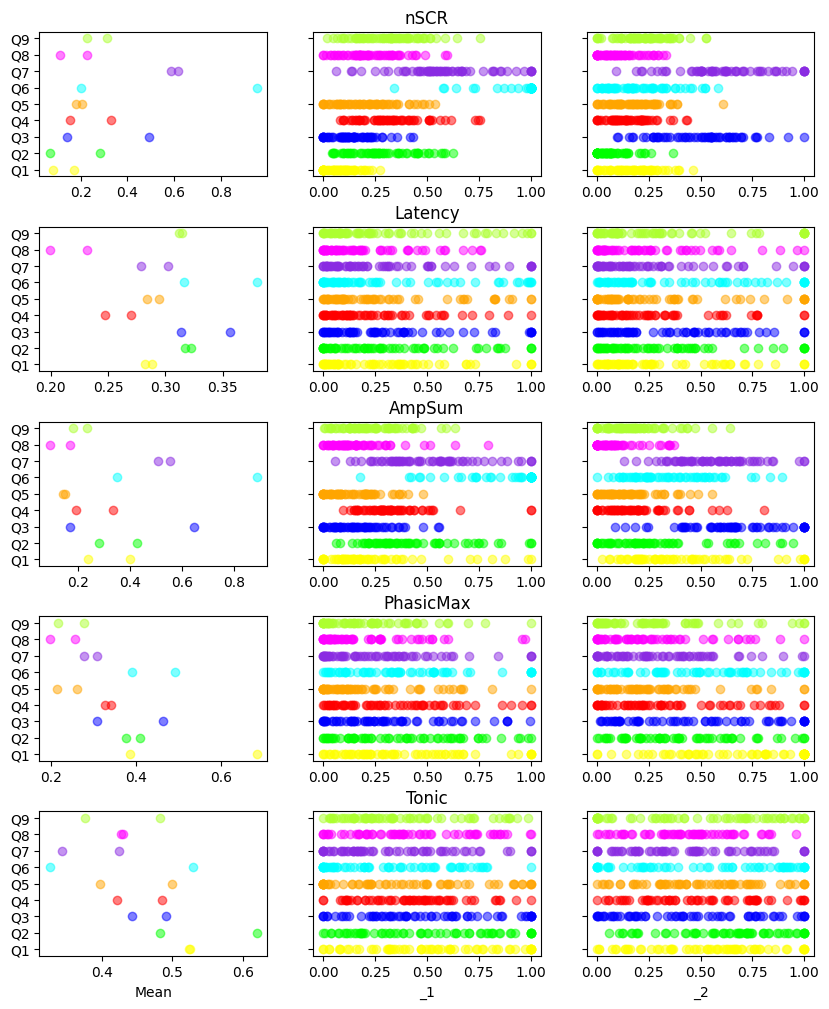

In [18]:
fig, axs = plt.subplots(5,3)
fig.set_size_inches(10,12)
plt.subplots_adjust(hspace=0.35)

for i,c in enumerate(dict_df_eda[v_name1].columns):
    axs[i,1].set_title(c)
    for v_name in dict_df_eda:
        i2 = int(v_name.split('_')[1])
        clr,y = clr_y_select(v_name)
        axs[i,0].scatter(np.mean(dict_df_eda[v_name][c]),y,color=clr, alpha=0.5)
        axs[i,i2].scatter(dict_df_eda[v_name][c],[y]*len(dict_df_eda[v_name][c]),color=clr, alpha=0.5)
    plt.sca(axs[i,0])
    plt.yticks(range(-4,5),['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'])
    axs[i,1].set_yticklabels([])
    axs[i,2].set_yticklabels([])
axs[4,0].set_xlabel('Mean')
axs[4,1].set_xlabel('_1')
axs[4,2].set_xlabel('_2')
plt.show()